# Goal

The objective of this project is to integrate New York City restaurant health inspection and Yelp review data. The final product will show the most recent grade, average score, percentage of inspections passed with an A or B grade, most recent inspection date, and an overall grade based on the average score as well as restaurant information such as type of transactions action (pickup, delivery, reservations) offered, cuisine type, and price.

# Libraries and Import Functions

To begin, I install the necessary libraries and functions for utilizing YelpAPI and pandas.



In [1]:
# Install Yelp API
!pip install --target=$nb_path yelpapi

In [2]:
from yelpapi import YelpAPI # Import YelpAPI
import pandas as pd # Import pandas
from pandas import json_normalize # Import json_normalize function
import numpy as np # Import numpy
import seaborn as sns
import matplotlib.pyplot as plt
api_key = 'DccOAYxwmw7xi4fEyq0MPWfSR7hJyNGZjwmFYD9VmpBl98mMZKHovl2LKSzprEDtEARULxzvwnDYEM4HyzE589NYKy5BMz-90qw8-4WZ-EOaRNN_JvTt5Hnxz9spZnYx' # Enter API key to make requests
yelp_api = YelpAPI(api_key)


# Data Collection and Cleaning

### New York City Health Inspections

I am going to import NYC health inspection data downloaded as a CSV from the NYC Open Data and uploaded to my google drive with the public link.

In [3]:
# Get CSV
nyc_health_df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSJGx564rpr7yyh9ZMMTCPeGwHfFtGF4NC1fw3mnWv_KXwcU1gf-SyGWi9URdqPQ8J1IKVkcfYQX0Kg/pub?gid=606305326&single=true&output=csv")

In [4]:
nyc_health_df.head() # Check

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50147475,LIGHT SALT,Manhattan,275,5 AVENUE,10016.0,9179633552,Asian/Asian Fusion,04/20/2024,No violations were recorded at the time of thi...,...,Inter-Agency Task Force / Initial Inspection,40.745653,-73.986571,105.0,4.0,7400.0,1016950.0,1.008590e+09,MN17,NaN
1,50147201,APPLEBEES NEIGHBORHOOD GRILL AND BAR,Queens,90-15,QUEENS BOULEVARD,11373.0,2018184669,NaN,01/01/1900,NaN,...,NaN,40.733840,-73.871577,404.0,25.0,68300.0,4045999.0,4.018600e+09,QN29,NaN
2,50111182,THE ALCHEMISTS KITCHEN,Manhattan,117,CROSBY STREET,10012.0,9177433747,NaN,01/01/1900,NaN,...,NaN,40.724261,-73.996616,102.0,1.0,4300.0,1007930.0,1.005100e+09,MN24,NaN
3,50149855,NaN,Queens,4036,82ND ST,11373.0,7184569331,NaN,01/01/1900,NaN,...,NaN,40.746721,-73.883783,404.0,25.0,26901.0,4036879.0,4.014920e+09,QN29,NaN
4,50150145,LIMELIGHT GRIMALDIS,0,NaN,NaN,NaN,5167700376,NaN,01/01/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Upon gathering the data, I checked column names and data types to undergo the cleaning process.

In [5]:
nyc_health_df.dtypes

CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
Latitude                 float64
Longitude                float64
Community Board          float64
Council District         float64
Census Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
Location Point1          float64
dtype: object

First, we will convert the inspection date (when the inspection was conducted) and the grade date (the date when the current grade was issued to the restaurant) to date time format. First, we impute NA values in the grade date column with 1/1/1900, the date utilized for nonexistent inspection dates.

In [6]:
nyc_health_df[nyc_health_df["GRADE DATE"].isna()] # Check for rows with NA Grade Date

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50147475,LIGHT SALT,Manhattan,275,5 AVENUE,10016.0,9179633552,Asian/Asian Fusion,04/20/2024,No violations were recorded at the time of thi...,...,Inter-Agency Task Force / Initial Inspection,40.745653,-73.986571,105.0,4.0,7400.0,1016950.0,1.008590e+09,MN17,NaN
1,50147201,APPLEBEES NEIGHBORHOOD GRILL AND BAR,Queens,90-15,QUEENS BOULEVARD,11373.0,2018184669,NaN,01/01/1900,NaN,...,NaN,40.733840,-73.871577,404.0,25.0,68300.0,4045999.0,4.018600e+09,QN29,NaN
2,50111182,THE ALCHEMISTS KITCHEN,Manhattan,117,CROSBY STREET,10012.0,9177433747,NaN,01/01/1900,NaN,...,NaN,40.724261,-73.996616,102.0,1.0,4300.0,1007930.0,1.005100e+09,MN24,NaN
3,50149855,NaN,Queens,4036,82ND ST,11373.0,7184569331,NaN,01/01/1900,NaN,...,NaN,40.746721,-73.883783,404.0,25.0,26901.0,4036879.0,4.014920e+09,QN29,NaN
4,50150145,LIMELIGHT GRIMALDIS,0,NaN,NaN,NaN,5167700376,NaN,01/01/1900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225033,50124300,FUKUROU,Brooklyn,105,WILSON AVENUE,11237.0,9145629586,Fusion,08/02/2023,Violations were cited in the following area(s).,...,Pre-permit (Operational) / Initial Inspection,40.701432,-73.927004,304.0,34.0,42700.0,3072499.0,3.031860e+09,BK77,NaN
225034,50063305,LUANNE'S WILD GINGER,Brooklyn,676,FRANKLIN AVENUE,11238.0,7186268663,Vegetarian,03/02/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.675352,-73.956284,308.0,35.0,30500.0,3028676.0,3.011560e+09,BK61,NaN
225036,41678260,JEN'S RESTAURANT,Bronx,3110,EAST TREMONT AVENUE,10461.0,7188283399,Chinese,08/20/2021,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.838435,-73.835408,210.0,13.0,19400.0,2073585.0,2.053500e+09,BX52,NaN
225041,50033511,DALE DINER,Bronx,189,WEST 231 STREET,10463.0,7185494445,American,11/01/2021,Violations were cited in the following area(s).,...,Administrative Miscellaneous / Initial Inspection,40.878740,-73.904297,208.0,11.0,28300.0,2094712.0,2.032670e+09,BX29,NaN


In [7]:
nyc_health_df["GRADE DATE"] = nyc_health_df["GRADE DATE"].fillna('1/1/1900') # Imput with 1/1/1900

Here, I convert the two date columns to datetime format.

In [8]:
nyc_health_df['Inspection Date'] = pd.to_datetime(nyc_health_df['INSPECTION DATE']) # Convert inspection date
nyc_health_df['Grade Date'] = pd.to_datetime(nyc_health_df['GRADE DATE']) # Convert grade date
nyc_health_df = nyc_health_df.drop(['INSPECTION DATE', 'GRADE DATE'], axis=1) # Drop original columns
nyc_health_df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,ACTION,VIOLATION CODE,...,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1,Inspection Date,Grade Date
0,50147475,LIGHT SALT,Manhattan,275,5 AVENUE,10016.0,9179633552,Asian/Asian Fusion,No violations were recorded at the time of thi...,NaN,...,-73.986571,105.0,4.0,7400.0,1016950.0,1.008590e+09,MN17,NaN,2024-04-20,1900-01-01
1,50147201,APPLEBEES NEIGHBORHOOD GRILL AND BAR,Queens,90-15,QUEENS BOULEVARD,11373.0,2018184669,NaN,NaN,NaN,...,-73.871577,404.0,25.0,68300.0,4045999.0,4.018600e+09,QN29,NaN,1900-01-01,1900-01-01
2,50111182,THE ALCHEMISTS KITCHEN,Manhattan,117,CROSBY STREET,10012.0,9177433747,NaN,NaN,NaN,...,-73.996616,102.0,1.0,4300.0,1007930.0,1.005100e+09,MN24,NaN,1900-01-01,1900-01-01
3,50149855,NaN,Queens,4036,82ND ST,11373.0,7184569331,NaN,NaN,NaN,...,-73.883783,404.0,25.0,26901.0,4036879.0,4.014920e+09,QN29,NaN,1900-01-01,1900-01-01
4,50150145,LIMELIGHT GRIMALDIS,0,NaN,NaN,NaN,5167700376,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01,1900-01-01


To ensure the dataframe is only composed of inspections with scores and grades, I utilized dropna() to remove all rows with null values in the specified columns.

In [9]:
nyc_health_clean = nyc_health_df.dropna(axis = 0, subset=['SCORE', 'GRADE'])

In [10]:
nyc_health_clean.shape # Check row count

(110697, 27)

Of the 27 columns, I opted to keep 15 that would be utilized for merging and creating the end product established within my goals.

In [11]:
nyc_health_clean = nyc_health_clean[['CAMIS', 'DBA', 'BORO', 'ZIPCODE','CUISINE DESCRIPTION', 'SCORE', 'GRADE', 'ACTION', 'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'Latitude', 'Longitude', 'Inspection Date', 'Grade Date']]

I additionally renamed the columns for clarity and merging.

In [12]:
nyc_health_clean = nyc_health_clean.rename(columns = {'CAMIS': 'CAMIS ID', "DBA": "Name", "BORO": "Borough", "ZIPCODE": "Zip_Code", 'CUISINE DESCRIPTION': 'Cuisine', 'SCORE': 'Score', 'GRADE': 'Grade', 'ACTION': 'Action', 'VIOLATION CODE': 'Violation Code', 'VIOLATION DESCRIPTION': 'Violation Description', 'CRITICAL FLAG': 'Critical Flag'})

I rounded the latitude and longitude columns to three decimal points for future merging.

In [13]:
nyc_health_clean.loc[:,'Latitude']  = nyc_health_clean['Latitude'].round(3)
nyc_health_clean.loc[:,'Longitude']  = nyc_health_clean['Longitude'].round(3)
nyc_health_clean.head()

,CAMIS ID,Name,Borough,Zip_Code,Cuisine,Score,Grade,Action,Violation Code,Violation Description,Critical Flag,Latitude,Longitude,Inspection Date,Grade Date
37,41348973,APPLEBEE'S,Staten Island,10314.0,American,12.0,A,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,40.582,-74.169,2023-04-13,2023-04-13
40,41337371,VINA DEL MAR RESTAURANT,Queens,11435.0,Latin American,11.0,A,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,40.703,-73.809,2020-01-28,2020-01-28
41,40366543,JARDIN DE CHINA REST,Queens,11368.0,Chinese,23.0,B,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,40.751,-73.870,2022-03-04,2022-03-04
43,41197199,AMC THEATRES,Manhattan,10024.0,American,5.0,A,Violations were cited in the following area(s).,09C,Food contact surface not properly maintained.,Not Critical,40.787,-73.978,2021-08-17,2021-08-17
47,50033660,RUSTY'S FLAVOR,Manhattan,NaN,Caribbean,4.0,P,Establishment re-opened by DOHMH.,10C,Lighting Inadequate,Not Critical,0.000,0.000,2022-04-21,2022-04-21


I pull the most recent grade of each restaurant, creating a new column called Most Recent Grade.

In [14]:
last_grade_date = nyc_health_clean.groupby('CAMIS ID')['Grade Date'].max() # Get most recent grade date for every restaurant
last_grade_date = last_grade_date.to_frame()
last_grade_date = last_grade_date.reset_index(col_level=1)
last_grade = pd.merge(nyc_health_clean, last_grade_date, on = ['CAMIS ID', 'Grade Date'], how = 'left')[['CAMIS ID', 'Grade']] # Merge to get inspectin data from most recent grade date for every restaurant
last_grade = last_grade.rename(columns = {'Grade': 'Most Recent Grade'}) # Rename to label Most Recent Grade
nyc_health = pd.merge(nyc_health_clean, last_grade, on = 'CAMIS ID', how = 'left') # Merge to get most recent grade on full dataset
nyc_health.head()

,CAMIS ID,Name,Borough,Zip_Code,Cuisine,Score,Grade,Action,Violation Code,Violation Description,Critical Flag,Latitude,Longitude,Inspection Date,Grade Date,Most Recent Grade
0,41348973,APPLEBEE'S,Staten Island,10314.0,American,12.0,A,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,40.582,-74.169,2023-04-13,2023-04-13,A
1,41348973,APPLEBEE'S,Staten Island,10314.0,American,12.0,A,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,40.582,-74.169,2023-04-13,2023-04-13,A
2,41348973,APPLEBEE'S,Staten Island,10314.0,American,12.0,A,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,40.582,-74.169,2023-04-13,2023-04-13,A
3,41348973,APPLEBEE'S,Staten Island,10314.0,American,12.0,A,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,40.582,-74.169,2023-04-13,2023-04-13,A
4,41348973,APPLEBEE'S,Staten Island,10314.0,American,12.0,A,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,40.582,-74.169,2023-04-13,2023-04-13,A


Then, I check to see if any values remain with the date 01/01/1990 that was imputed for NA values and drop those rows.

In [15]:
nyc_health = nyc_health[nyc_health['Inspection Date'] !='1900-01-01']
nyc_health = nyc_health[nyc_health['Grade Date'] !='1900-01-01']

Lastly, I dropped any remaining rows with NA values.

In [16]:
nyc_health = nyc_health.dropna()
nyc_health.head()

,CAMIS ID,Name,Borough,Zip_Code,Cuisine,Score,Grade,Action,Violation Code,Violation Description,Critical Flag,Latitude,Longitude,Inspection Date,Grade Date,Most Recent Grade
0,41348973,APPLEBEE'S,Staten Island,10314.0,American,12.0,A,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,40.582,-74.169,2023-04-13,2023-04-13,A
1,41348973,APPLEBEE'S,Staten Island,10314.0,American,12.0,A,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,40.582,-74.169,2023-04-13,2023-04-13,A
2,41348973,APPLEBEE'S,Staten Island,10314.0,American,12.0,A,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,40.582,-74.169,2023-04-13,2023-04-13,A
3,41348973,APPLEBEE'S,Staten Island,10314.0,American,12.0,A,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,40.582,-74.169,2023-04-13,2023-04-13,A
4,41348973,APPLEBEE'S,Staten Island,10314.0,American,12.0,A,Violations were cited in the following area(s).,09B,Thawing procedure improper.,Not Critical,40.582,-74.169,2023-04-13,2023-04-13,A



### New York City Restaurants

With the previously loaded YelpAPI, I am going to make a dataframe using the search_query() function to pull restaurants in New York City. In order to get a number of restaurants beyond the individual query limit of 50, I create a for loop that searches for restaurants in New York City using Yelp API, normalizes the json of this query, and appends it to a dataframe. To avoid pulling the same restaurants continuously, the loop iterates through a list of New York City zip codes to pull fifty restaurants with each zipcode being added to the location of the search query. To determine zipcodes, I checked the list of zip codes in the nyc_health dataframe.

In [17]:
nyc_health['Zip_Code'].value_counts()

Zip_Code
10013.0    15575
10003.0    12494
10002.0    10922
10001.0    10631
10019.0    10547
           ...  
11001.0        5
10176.0        4
10155.0        4
10171.0        4
10107.0        1
Name: count, Length: 219, dtype: int64

To get the list of zipcodes, I randomly selected 50 zipcodes from the inspections dataframe. The full list of zipcodes was not utilized to maintain query efficiency.

In [18]:
boroughs = ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'] # List of boroughs
zips = list() # Empty list for zipcodes
for borough in boroughs:
  rows = nyc_health[nyc_health['Borough'] == borough] # Get subset of health dataframe for specific borough
  rows = rows.dropna() # Drop NA values
  rows = rows.drop_duplicates(subset = 'Zip_Code') # Remove duplicate zipcodes
  rows.loc[:,'Zip_Code']  = rows['Zip_Code'].astype(str) # Convert to string
  rows.loc[:,'Zip_Code']  = rows['Zip_Code'].str[:-2] # Remove .0
  samp = rows.sample(n=10) # Sample ten rows from dataframe
  add = samp['Zip_Code'].tolist() # Get list of zipcodes
  zips += add # Add zipcodes to list
zips

['10457',
 '10472',
 '10459',
 '10458',
 '10464',
 '10463',
 '10462',
 '10470',
 '10453',
 '10465',
 '11201',
 '11226',
 '11241',
 '11220',
 '11205',
 '11208',
 '11219',
 '11217',
 '11236',
 '11233',
 '10020',
 '10025',
 '10044',
 '10178',
 '10107',
 '10037',
 '10177',
 '10048',
 '10069',
 '10169',
 '11109',
 '11697',
 '11420',
 '11377',
 '11369',
 '11371',
 '11423',
 '11413',
 '11385',
 '11433',
 '10307',
 '10304',
 '10305',
 '10303',
 '10306',
 '10314',
 '10310',
 '10308',
 '10302',
 '10301']

In [19]:
nyc_restaurants_df = list() # Create empty list
zip_codes = zips # Load random zip codes
for zip in zip_codes:
  nyc_restaurants = yelp_api.search_query(term = 'restaurant', location = f'New York City {zip}', limit=50) # Get 50 results for query
  df = json_normalize(nyc_restaurants['businesses']) # Normalize json to get businesses
  nyc_restaurants_df.append(df) # Append to list


nyc_restaurants_df = pd.concat(nyc_restaurants_df) # Create pandas dataframe from list

Here I check the rows and columns of the dataframe to ensure the for loop and Yelp API worked properly.

In [20]:
nyc_restaurants_df.shape # Check row count

(2394, 28)

In [21]:
nyc_restaurants_df.head() # Check columns

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address,attributes.business_temp_closed,attributes.menu_url,attributes.open24_hours,attributes.waitlist_reservation
0,b6jOwyX4iaagw8YjXqq1sA,antonios-trattoria-bronx,Antonio's Trattoria,https://s3-media3.fl.yelpcdn.com/bphoto/5SLLKH...,False,https://www.yelp.com/biz/antonios-trattoria-br...,1076,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.5,"[pickup, delivery]",...,,Bronx,10458,US,NY,"[2370 Belmont Ave, Bronx, NY 10458]",None,None,None,None
1,tLZfepIfSf0a80zHQTbTGQ,trattoria-zero-otto-nove-bronx,Trattoria Zero Otto Nove,https://s3-media1.fl.yelpcdn.com/bphoto/6zZwzj...,False,https://www.yelp.com/biz/trattoria-zero-otto-n...,919,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.1,[delivery],...,,Bronx,10458,US,NY,"[2357 Arthur Ave, Bronx, NY 10458]",None,https://www.zeroottonove.com/locations/bronx#Menu,None,None
2,SOzVclZ9WW0Jb1wF3CqPGw,frankies-restaurant-bronx,Frankie's Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/gpYaLH...,False,https://www.yelp.com/biz/frankies-restaurant-b...,9,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.8,[],...,None,Bronx,10458,US,NY,"[2376 Arthur Ave, Bronx, NY 10458]",None,https://www.frankiesrestaurant.nyc/menu,None,None
3,mkS--Oq4UYJMQizSaKJXEw,enzos-of-arthur-avenue-bronx-2,Enzos of Arthur Avenue,https://s3-media2.fl.yelpcdn.com/bphoto/FExt0Z...,False,https://www.yelp.com/biz/enzos-of-arthur-avenu...,480,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",3.9,[delivery],...,,Bronx,10458,US,NY,"[2339 Arthur Ave, Bronx, NY 10458]",None,None,None,None
4,hLm1vXfAKuSOgAtBA-vO7w,çka-ka-qëllu-bronx,ÇKA KA QËLLU,https://s3-media1.fl.yelpcdn.com/bphoto/8C1r1B...,False,https://www.yelp.com/biz/%C3%A7ka-ka-q%C3%ABll...,146,"[{'alias': 'modern_european', 'title': 'Modern...",4.4,"[pickup, delivery]",...,None,Bronx,10458,US,NY,"[2321 Hughes Ave, Bronx, NY 10458]",None,https://ckakaqellu.com/menu.html,None,None


To ensure the restaurants generated are in New York City, I check the location city of the restaurants in the dataframe. I then remove all rows without New York, New York City, or one of the five boroughs as their location.

In [22]:
# Check city locations
nyc_restaurants_df["location.city"].value_counts()

location.city
Brooklyn              491
Staten Island         463
New York              451
Bronx                 385
Jamaica                89
                     ... 
HOLLIS                  1
Bedford-Stuyvesant      1
Crown Heights           1
East Flatbush           1
Bayonne                 1
Name: count, Length: 89, dtype: int64

In [23]:
nyc_restaurants_clean = nyc_restaurants_df[(nyc_restaurants_df["location.city"] == "New York") | (nyc_restaurants_df["location.city"] == "New York City") |
 (nyc_restaurants_df["location.city"] == "Bronx") | (nyc_restaurants_df["location.city"] == "Brooklyn") | (nyc_restaurants_df["location.city"] == "Manhattan") |
 (nyc_restaurants_df["location.city"] == "Queens") | (nyc_restaurants_df["location.city"] == "Staten Island")]
nyc_restaurants_clean.shape

(1879, 28)

Now that observations not meeting the criteria of location have been removed, I check the data types of the columns.

In [24]:
nyc_restaurants_clean.dtypes

id                                  object
alias                               object
name                                object
image_url                           object
is_closed                             bool
url                                 object
review_count                         int64
categories                          object
rating                             float64
transactions                        object
price                               object
phone                               object
display_phone                       object
distance                           float64
coordinates.latitude               float64
coordinates.longitude              float64
location.address1                   object
location.address2                   object
location.address3                   object
location.city                       object
location.zip_code                   object
location.country                    object
location.state                      object
location.di

The transactions column contained list that detail whether a restaurant has pickup, delivery, and reservation options. I created new columns for each transaction type.

In [25]:
nyc_restaurants_clean.loc[:,'Pickup'] = nyc_restaurants_clean['transactions'].apply(lambda x: 'pickup' in x) # Get boolean for pickup option
nyc_restaurants_clean.loc[:,'Pickup'] = nyc_restaurants_clean.loc[:,'Pickup'].replace({True: 'Yes', False: 'No'}) # Convert to yes and no
nyc_restaurants_clean.loc[:,'Delivery'] = nyc_restaurants_clean['transactions'].apply(lambda x: 'delivery' in x) # Get boolean for delivery option
nyc_restaurants_clean.loc[:,'Delivery'] = nyc_restaurants_clean.loc[:,'Delivery'].replace({True: 'Yes', False: 'No'}) # Convert to yes and no
nyc_restaurants_clean.loc[:,'Restaurant_Reservation'] = nyc_restaurants_clean['transactions'].apply(lambda x: 'restaurant_reservation' in x) # Get boolean for reservation option
nyc_restaurants_clean.loc[:,'Restaurant_Reservation'] = nyc_restaurants_clean.loc[:,'Restaurant_Reservation'].replace({True: 'Yes', False: 'No'}) # Convert to yes and no
nyc_restaurants_clean.head()

<ipython-input-25-5ce885dd305a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_restaurants_clean.loc[:,'Pickup'] = nyc_restaurants_clean['transactions'].apply(lambda x: 'pickup' in x) # Get boolean for pickup option
<ipython-input-25-5ce885dd305a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_restaurants_clean.loc[:,'Delivery'] = nyc_restaurants_clean['transactions'].apply(lambda x: 'delivery' in x) # Get boolean for delivery option
<ipython-input-25-5ce885dd305a>:5: SettingWithCopyWarning: 
A 

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,location.country,location.state,location.display_address,attributes.business_temp_closed,attributes.menu_url,attributes.open24_hours,attributes.waitlist_reservation,Pickup,Delivery,Restaurant_Reservation
0,b6jOwyX4iaagw8YjXqq1sA,antonios-trattoria-bronx,Antonio's Trattoria,https://s3-media3.fl.yelpcdn.com/bphoto/5SLLKH...,False,https://www.yelp.com/biz/antonios-trattoria-br...,1076,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.5,"[pickup, delivery]",...,US,NY,"[2370 Belmont Ave, Bronx, NY 10458]",None,None,None,None,Yes,Yes,No
1,tLZfepIfSf0a80zHQTbTGQ,trattoria-zero-otto-nove-bronx,Trattoria Zero Otto Nove,https://s3-media1.fl.yelpcdn.com/bphoto/6zZwzj...,False,https://www.yelp.com/biz/trattoria-zero-otto-n...,919,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.1,[delivery],...,US,NY,"[2357 Arthur Ave, Bronx, NY 10458]",None,https://www.zeroottonove.com/locations/bronx#Menu,None,None,No,Yes,No
2,SOzVclZ9WW0Jb1wF3CqPGw,frankies-restaurant-bronx,Frankie's Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/gpYaLH...,False,https://www.yelp.com/biz/frankies-restaurant-b...,9,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.8,[],...,US,NY,"[2376 Arthur Ave, Bronx, NY 10458]",None,https://www.frankiesrestaurant.nyc/menu,None,None,No,No,No
3,mkS--Oq4UYJMQizSaKJXEw,enzos-of-arthur-avenue-bronx-2,Enzos of Arthur Avenue,https://s3-media2.fl.yelpcdn.com/bphoto/FExt0Z...,False,https://www.yelp.com/biz/enzos-of-arthur-avenu...,480,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",3.9,[delivery],...,US,NY,"[2339 Arthur Ave, Bronx, NY 10458]",None,None,None,None,No,Yes,No
4,hLm1vXfAKuSOgAtBA-vO7w,çka-ka-qëllu-bronx,ÇKA KA QËLLU,https://s3-media1.fl.yelpcdn.com/bphoto/8C1r1B...,False,https://www.yelp.com/biz/%C3%A7ka-ka-q%C3%ABll...,146,"[{'alias': 'modern_european', 'title': 'Modern...",4.4,"[pickup, delivery]",...,US,NY,"[2321 Hughes Ave, Bronx, NY 10458]",None,https://ckakaqellu.com/menu.html,None,None,Yes,Yes,No


To make the two datasets match zipcode format, I convert the Yelp zipcodes to float format.

In [26]:
nyc_restaurants_clean.loc[:,'location.zip_code']  = nyc_restaurants_clean['location.zip_code'].astype(float)
nyc_restaurants_clean.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,location.country,location.state,location.display_address,attributes.business_temp_closed,attributes.menu_url,attributes.open24_hours,attributes.waitlist_reservation,Pickup,Delivery,Restaurant_Reservation
0,b6jOwyX4iaagw8YjXqq1sA,antonios-trattoria-bronx,Antonio's Trattoria,https://s3-media3.fl.yelpcdn.com/bphoto/5SLLKH...,False,https://www.yelp.com/biz/antonios-trattoria-br...,1076,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.5,"[pickup, delivery]",...,US,NY,"[2370 Belmont Ave, Bronx, NY 10458]",None,None,None,None,Yes,Yes,No
1,tLZfepIfSf0a80zHQTbTGQ,trattoria-zero-otto-nove-bronx,Trattoria Zero Otto Nove,https://s3-media1.fl.yelpcdn.com/bphoto/6zZwzj...,False,https://www.yelp.com/biz/trattoria-zero-otto-n...,919,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.1,[delivery],...,US,NY,"[2357 Arthur Ave, Bronx, NY 10458]",None,https://www.zeroottonove.com/locations/bronx#Menu,None,None,No,Yes,No
2,SOzVclZ9WW0Jb1wF3CqPGw,frankies-restaurant-bronx,Frankie's Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/gpYaLH...,False,https://www.yelp.com/biz/frankies-restaurant-b...,9,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.8,[],...,US,NY,"[2376 Arthur Ave, Bronx, NY 10458]",None,https://www.frankiesrestaurant.nyc/menu,None,None,No,No,No
3,mkS--Oq4UYJMQizSaKJXEw,enzos-of-arthur-avenue-bronx-2,Enzos of Arthur Avenue,https://s3-media2.fl.yelpcdn.com/bphoto/FExt0Z...,False,https://www.yelp.com/biz/enzos-of-arthur-avenu...,480,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",3.9,[delivery],...,US,NY,"[2339 Arthur Ave, Bronx, NY 10458]",None,None,None,None,No,Yes,No
4,hLm1vXfAKuSOgAtBA-vO7w,çka-ka-qëllu-bronx,ÇKA KA QËLLU,https://s3-media1.fl.yelpcdn.com/bphoto/8C1r1B...,False,https://www.yelp.com/biz/%C3%A7ka-ka-q%C3%ABll...,146,"[{'alias': 'modern_european', 'title': 'Modern...",4.4,"[pickup, delivery]",...,US,NY,"[2321 Hughes Ave, Bronx, NY 10458]",None,https://ckakaqellu.com/menu.html,None,None,Yes,Yes,No


Additionally, I impute all NA price values with 'Unknown'.

In [27]:
nyc_restaurants_clean.loc[:,"price"] = nyc_restaurants_clean["price"].fillna("Unknown")

Now, I select and rename the columns I want to keep in my final dataframe.

In [28]:
nyc_restaurants = nyc_restaurants_clean[["id", "name", "url", "review_count", "rating", "price", "phone", "coordinates.latitude", "coordinates.longitude", "location.address1", "location.zip_code", "Pickup", "Delivery", "Restaurant_Reservation"]]
nyc_restaurants = nyc_restaurants.rename(columns = {"id": "Yelp_ID", "name": "Name", "url": "Yelp URL", "review_count": "Total_Reviews", "rating": "Rating","price": "Price", "phone": "Phone", "coordinates.latitude": "Latitude", "coordinates.longitude": "Longitude", "location.address1": "Address", "location.zip_code": "Zip_Code"})
nyc_restaurants.head()

,Yelp_ID,Name,Yelp URL,Total_Reviews,Rating,Price,Phone,Latitude,Longitude,Address,Zip_Code,Pickup,Delivery,Restaurant_Reservation
0,b6jOwyX4iaagw8YjXqq1sA,Antonio's Trattoria,https://www.yelp.com/biz/antonios-trattoria-br...,1076,4.5,$$,+17187336630,40.854131,-73.886601,2370 Belmont Ave,10458.0,Yes,Yes,No
1,tLZfepIfSf0a80zHQTbTGQ,Trattoria Zero Otto Nove,https://www.yelp.com/biz/trattoria-zero-otto-n...,919,4.1,$$,+17182201027,40.854779,-73.888474,2357 Arthur Ave,10458.0,No,Yes,No
2,SOzVclZ9WW0Jb1wF3CqPGw,Frankie's Restaurant,https://www.yelp.com/biz/frankies-restaurant-b...,9,4.8,Unknown,+13472701452,40.855800,-73.887360,2376 Arthur Ave,10458.0,No,No,No
3,mkS--Oq4UYJMQizSaKJXEw,Enzos of Arthur Avenue,https://www.yelp.com/biz/enzos-of-arthur-avenu...,480,3.9,$$,+17187334455,40.854717,-73.888724,2339 Arthur Ave,10458.0,No,Yes,No
4,hLm1vXfAKuSOgAtBA-vO7w,ÇKA KA QËLLU,https://www.yelp.com/biz/%C3%A7ka-ka-q%C3%ABll...,146,4.4,$$,+17189336194,40.853802,-73.888242,2321 Hughes Ave,10458.0,Yes,Yes,No


Now that the columns are limited to only those that will be used, I wanted to ensure that each row exhibited a unique observation.

In [29]:
nyc_restaurants["Yelp_ID"].value_counts()
nyc_restaurants.head()

,Yelp_ID,Name,Yelp URL,Total_Reviews,Rating,Price,Phone,Latitude,Longitude,Address,Zip_Code,Pickup,Delivery,Restaurant_Reservation
0,b6jOwyX4iaagw8YjXqq1sA,Antonio's Trattoria,https://www.yelp.com/biz/antonios-trattoria-br...,1076,4.5,$$,+17187336630,40.854131,-73.886601,2370 Belmont Ave,10458.0,Yes,Yes,No
1,tLZfepIfSf0a80zHQTbTGQ,Trattoria Zero Otto Nove,https://www.yelp.com/biz/trattoria-zero-otto-n...,919,4.1,$$,+17182201027,40.854779,-73.888474,2357 Arthur Ave,10458.0,No,Yes,No
2,SOzVclZ9WW0Jb1wF3CqPGw,Frankie's Restaurant,https://www.yelp.com/biz/frankies-restaurant-b...,9,4.8,Unknown,+13472701452,40.855800,-73.887360,2376 Arthur Ave,10458.0,No,No,No
3,mkS--Oq4UYJMQizSaKJXEw,Enzos of Arthur Avenue,https://www.yelp.com/biz/enzos-of-arthur-avenu...,480,3.9,$$,+17187334455,40.854717,-73.888724,2339 Arthur Ave,10458.0,No,Yes,No
4,hLm1vXfAKuSOgAtBA-vO7w,ÇKA KA QËLLU,https://www.yelp.com/biz/%C3%A7ka-ka-q%C3%ABll...,146,4.4,$$,+17189336194,40.853802,-73.888242,2321 Hughes Ave,10458.0,Yes,Yes,No


Because there are numerous duplicate restaurants, we are going to remove all duplicates based on Yelp ID.

In [30]:
nyc_restaurants = nyc_restaurants.drop_duplicates(subset = 'Yelp_ID', keep = 'first')
nyc_restaurants.shape

(1343, 14)

In [31]:
nyc_restaurants.head()

,Yelp_ID,Name,Yelp URL,Total_Reviews,Rating,Price,Phone,Latitude,Longitude,Address,Zip_Code,Pickup,Delivery,Restaurant_Reservation
0,b6jOwyX4iaagw8YjXqq1sA,Antonio's Trattoria,https://www.yelp.com/biz/antonios-trattoria-br...,1076,4.5,$$,+17187336630,40.854131,-73.886601,2370 Belmont Ave,10458.0,Yes,Yes,No
1,tLZfepIfSf0a80zHQTbTGQ,Trattoria Zero Otto Nove,https://www.yelp.com/biz/trattoria-zero-otto-n...,919,4.1,$$,+17182201027,40.854779,-73.888474,2357 Arthur Ave,10458.0,No,Yes,No
2,SOzVclZ9WW0Jb1wF3CqPGw,Frankie's Restaurant,https://www.yelp.com/biz/frankies-restaurant-b...,9,4.8,Unknown,+13472701452,40.855800,-73.887360,2376 Arthur Ave,10458.0,No,No,No
3,mkS--Oq4UYJMQizSaKJXEw,Enzos of Arthur Avenue,https://www.yelp.com/biz/enzos-of-arthur-avenu...,480,3.9,$$,+17187334455,40.854717,-73.888724,2339 Arthur Ave,10458.0,No,Yes,No
4,hLm1vXfAKuSOgAtBA-vO7w,ÇKA KA QËLLU,https://www.yelp.com/biz/%C3%A7ka-ka-q%C3%ABll...,146,4.4,$$,+17189336194,40.853802,-73.888242,2321 Hughes Ave,10458.0,Yes,Yes,No


Here, I am going to capitalize the restaurant names to match the NYC Health Inspection data in the following section.

In [32]:
nyc_restaurants.loc[:,'Name'] = nyc_restaurants['Name'].str.upper()
nyc_restaurants.head()

,Yelp_ID,Name,Yelp URL,Total_Reviews,Rating,Price,Phone,Latitude,Longitude,Address,Zip_Code,Pickup,Delivery,Restaurant_Reservation
0,b6jOwyX4iaagw8YjXqq1sA,ANTONIO'S TRATTORIA,https://www.yelp.com/biz/antonios-trattoria-br...,1076,4.5,$$,+17187336630,40.854131,-73.886601,2370 Belmont Ave,10458.0,Yes,Yes,No
1,tLZfepIfSf0a80zHQTbTGQ,TRATTORIA ZERO OTTO NOVE,https://www.yelp.com/biz/trattoria-zero-otto-n...,919,4.1,$$,+17182201027,40.854779,-73.888474,2357 Arthur Ave,10458.0,No,Yes,No
2,SOzVclZ9WW0Jb1wF3CqPGw,FRANKIE'S RESTAURANT,https://www.yelp.com/biz/frankies-restaurant-b...,9,4.8,Unknown,+13472701452,40.855800,-73.887360,2376 Arthur Ave,10458.0,No,No,No
3,mkS--Oq4UYJMQizSaKJXEw,ENZOS OF ARTHUR AVENUE,https://www.yelp.com/biz/enzos-of-arthur-avenu...,480,3.9,$$,+17187334455,40.854717,-73.888724,2339 Arthur Ave,10458.0,No,Yes,No
4,hLm1vXfAKuSOgAtBA-vO7w,ÇKA KA QËLLU,https://www.yelp.com/biz/%C3%A7ka-ka-q%C3%ABll...,146,4.4,$$,+17189336194,40.853802,-73.888242,2321 Hughes Ave,10458.0,Yes,Yes,No


I am going to remove the +1 from the start of every phone number to match the NYC Health Inspection data.

In [33]:
nyc_restaurants.loc[:,'Phone']  = nyc_restaurants['Phone'].str[2:]

I am going to round the latitude and longitude to three decimal places.

In [34]:
nyc_restaurants.loc[:,'Latitude']  = nyc_restaurants['Latitude'].round(3)
nyc_restaurants.loc[:,'Longitude']  = nyc_restaurants['Longitude'].round(3)
nyc_restaurants.head()

,Yelp_ID,Name,Yelp URL,Total_Reviews,Rating,Price,Phone,Latitude,Longitude,Address,Zip_Code,Pickup,Delivery,Restaurant_Reservation
0,b6jOwyX4iaagw8YjXqq1sA,ANTONIO'S TRATTORIA,https://www.yelp.com/biz/antonios-trattoria-br...,1076,4.5,$$,7187336630,40.854,-73.887,2370 Belmont Ave,10458.0,Yes,Yes,No
1,tLZfepIfSf0a80zHQTbTGQ,TRATTORIA ZERO OTTO NOVE,https://www.yelp.com/biz/trattoria-zero-otto-n...,919,4.1,$$,7182201027,40.855,-73.888,2357 Arthur Ave,10458.0,No,Yes,No
2,SOzVclZ9WW0Jb1wF3CqPGw,FRANKIE'S RESTAURANT,https://www.yelp.com/biz/frankies-restaurant-b...,9,4.8,Unknown,3472701452,40.856,-73.887,2376 Arthur Ave,10458.0,No,No,No
3,mkS--Oq4UYJMQizSaKJXEw,ENZOS OF ARTHUR AVENUE,https://www.yelp.com/biz/enzos-of-arthur-avenu...,480,3.9,$$,7187334455,40.855,-73.889,2339 Arthur Ave,10458.0,No,Yes,No
4,hLm1vXfAKuSOgAtBA-vO7w,ÇKA KA QËLLU,https://www.yelp.com/biz/%C3%A7ka-ka-q%C3%ABll...,146,4.4,$$,7189336194,40.854,-73.888,2321 Hughes Ave,10458.0,Yes,Yes,No


### Merging

Now that I have the desired columns for the two dataframes, I am going to merge them. To do so, I utilized phone, name, latitude, longitude, and zip code, only keeping those that have matchning information for all five criteria.

In [35]:
full_nyc = nyc_restaurants.merge(nyc_health, on = ['Name', 'Latitude', 'Longitude', 'Zip_Code'], how ='inner')
full_nyc = full_nyc.drop_duplicates()
full_nyc.shape

(1633, 26)

I opted to remove the .0 at the end of the zipcodes.

I then checked how many restaurants were in the remaining dataframe.

In [36]:
full_nyc['Yelp_ID'].value_counts()

Yelp_ID
x_YWFkTcxEu1lo8Nlrog5A    39
OwJjcpwlxXpxQqtdziKGJw    33
jtFkc3mJBCtjUzR8sS6E3Q    26
BNaveJmi-OUGKG9sRfrIhA    24
zww7OtudkcE921UT2ThOSg    20
                          ..
m7n9yZ6VZeRknKuLqb38ug     1
10BR62OFcL6IlljyYiIWbg     1
h8J10FpJGaU_4OvP2MgoKQ     1
60M7dk6cX6QCHAiGqB1GLg     1
LjEDl2FrmnfEaqN0-INOrA     1
Name: count, Length: 318, dtype: int64

In order to create a primary key for later use in the case that there are multiple restaurants of the same name at different locations, I created a new variable Restaurant ID based on the Yelp ID.

In [37]:
full_nyc['Restaurant ID'] = pd.factorize(full_nyc['Yelp_ID'])[0]

I left the zipcodes as float values for efficiency of merging but now opted to convert them to integer form to drop the .0 at the end of the values.

In [38]:
full_nyc.loc[:, 'Zip_Code'] = full_nyc['Zip_Code'].astype(int)

Lastly, I will create an ID for every inspection to utilize as a primary key later on.

In [39]:
full_nyc['Inspection_ID'] = full_nyc.index
full_nyc.head()

,Yelp_ID,Name,Yelp URL,Total_Reviews,Rating,Price,Phone,Latitude,Longitude,Address,...,Grade,Action,Violation Code,Violation Description,Critical Flag,Inspection Date,Grade Date,Most Recent Grade,Restaurant ID,Inspection_ID
0,b6jOwyX4iaagw8YjXqq1sA,ANTONIO'S TRATTORIA,https://www.yelp.com/biz/antonios-trattoria-br...,1076,4.5,$$,7187336630,40.854,-73.887,2370 Belmont Ave,...,A,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Critical,2022-04-18,2022-04-18,A,0,0
2,b6jOwyX4iaagw8YjXqq1sA,ANTONIO'S TRATTORIA,https://www.yelp.com/biz/antonios-trattoria-br...,1076,4.5,$$,7187336630,40.854,-73.887,2370 Belmont Ave,...,A,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,2022-04-18,2022-04-18,A,0,2
4,Lesv5BG0_0-8bB49cAjMkg,ROBERTO'S,https://www.yelp.com/biz/robertos-bronx?adjust...,305,4.1,$$$,7187339503,40.854,-73.888,603 Crescent Ave,...,A,Violations were cited in the following area(s).,06A,Personal cleanliness is inadequate. Outer garm...,Critical,2023-04-14,2023-04-14,A,1,4
5,WDVzL34VpkiYOtknS-NpWQ,EMILIA'S RESTAURANT,https://www.yelp.com/biz/emilias-restaurant-br...,249,3.9,$$,7183675915,40.854,-73.889,2331 Arthur Ave,...,Z,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,2024-03-27,2024-03-27,Z,2,5
6,WDVzL34VpkiYOtknS-NpWQ,EMILIA'S RESTAURANT,https://www.yelp.com/biz/emilias-restaurant-br...,249,3.9,$$,7183675915,40.854,-73.889,2331 Arthur Ave,...,Z,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,2024-03-27,2024-03-27,A,2,6


# SQL and Relational Data Base Creation

Here, we install and import the MySQL connector.

In [40]:
#here we install the mysql connector
!pip install mysql-connector-python

In [41]:
import mysql.connector

Now we connect to my AWS database.

In [42]:
#connection information
mysql_address  = 'ista322db.c32q68km82p8.us-east-2.rds.amazonaws.com'
mysql_username='laurenellis'
mysql_password='ista322db'
mysql_database = 'myista322dbs'

def get_conn_cur():
    cnx = mysql.connector.connect(user=mysql_username, password=mysql_password,
          host=mysql_address,
          database=mysql_database, port='3306');
    return (cnx, cnx.cursor())

In [43]:
# Get conn and cursor object
conn, cur = get_conn_cur()

I am going to make a function to run queries.

In [44]:
def run_query(query_string):

  conn, cur = get_conn_cur() # get connection and cursor

  cur.execute(query_string) # executing string as before

  my_data = cur.fetchall() # fetch query data as before

  result_df = pd.DataFrame(my_data, columns=cur.column_names)


  cur.close() # close
  conn.close() # close

  return result_df

This function will return the head of tables in the AWS database.

In [45]:
# make sql_head function

def sql_head(table_name):
  conn, cur = get_conn_cur() # get connection and cursor

  # Select head
  table_head_query =  """SELECT * FROM %s LIMIT 5 """ %table_name

  cur.execute(table_head_query) # exectue
  my_data = cur.fetchall() # store
  result_df = pd.DataFrame(my_data, columns=cur.column_names)

  cur.close() # close
  conn.close() # close

  return result_df # return

Now that functions have been created and the AWS database is connected, I will create tables for restaurant information, yelp reviews, health overview, and inspections.

I will start with the inspection table as it required the creation of a new, rollup dataframe.

In [46]:
# Drop tables
drop = """ DROP TABLE IF EXISTS restaurant_info, yelp_info, health_overview_info, inspection_info;"""
cur.execute(drop)
conn.commit()

First, I create a table for restaurant information.

In [47]:
# Make df of restaurant info
restaurant_info_df = full_nyc[['Restaurant ID', 'Name', 'Borough', 'Address', 'Zip_Code', 'Phone', 'Cuisine', 'Price', 'Pickup', 'Delivery', 'Restaurant_Reservation']].drop_duplicates()

In [48]:
# Create restaurant table
create_restaurant = """ CREATE TABLE IF NOT EXISTS restaurant_info (
                  restaurant_id INTEGER PRIMARY KEY,
                  name VARCHAR(255) NOT NULL,
                  borough VARCHAR(255) NOT NULL,
                  address VARCHAR(255) NOT NULL,
                  zipcode INTEGER NOT NULL,
                  phone INTEGER NOT NULL,
                  cuisine VARCHAR(255) NOT NULL,
                  price VARCHAR(255) NOT NULL,
                  pickup VARCHAR(255) NOT NULL,
                  delivery VARCHAR(255) NOT NULL,
                  restaurant_reservation VARCHAR(255) NOT NULL
                  );"""
cur.execute(create_restaurant)
conn.commit()

In [49]:
# Load data
restaurant_tuples = restaurant_info_df.values.tolist() # Get dataframe as tuples
load_restaurants = """INSERT INTO restaurant_info (restaurant_id, name, borough, address, zipcode, phone, cuisine, price, pickup, delivery, restaurant_reservation) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"""
for x in restaurant_tuples:
  cur.execute(load_restaurants, x)
  conn.commit()

In [50]:
# Check
sql_head(table_name = 'restaurant_info')

,restaurant_id,name,borough,address,zipcode,phone,cuisine,price,pickup,delivery,restaurant_reservation
0,0,ANTONIO'S TRATTORIA,Bronx,2370 Belmont Ave,10458,2147483647,Italian,$$,Yes,Yes,No
1,1,ROBERTO'S,Bronx,603 Crescent Ave,10458,2147483647,Italian,$$$,No,Yes,No
2,2,EMILIA'S RESTAURANT,Bronx,2331 Arthur Ave,10458,2147483647,Italian,$$,Yes,No,No
3,3,CACHAPA CACHAPA,Bronx,1903 Bathgate Ave,10457,2147483647,Latin American,$,Yes,Yes,No
4,4,COLIMA TAQUERIA,Bronx,608 E 187th St,10458,0,Mexican,Unknown,Yes,Yes,No


Next, I create a Yelp table with inspection_id connecting to the inspection_info table and restaurant_id connecting to the restaurant_info table.

In [51]:
# Make Yelp dataframe
yelp_info_df = full_nyc[['Yelp_ID', 'Name', 'Total_Reviews', 'Rating', 'Yelp URL', 'Restaurant ID']].drop_duplicates()
yelp_info_df.head()

,Yelp_ID,Name,Total_Reviews,Rating,Yelp URL,Restaurant ID
0,b6jOwyX4iaagw8YjXqq1sA,ANTONIO'S TRATTORIA,1076,4.5,https://www.yelp.com/biz/antonios-trattoria-br...,0
4,Lesv5BG0_0-8bB49cAjMkg,ROBERTO'S,305,4.1,https://www.yelp.com/biz/robertos-bronx?adjust...,1
5,WDVzL34VpkiYOtknS-NpWQ,EMILIA'S RESTAURANT,249,3.9,https://www.yelp.com/biz/emilias-restaurant-br...,2
54,3D4DxZAwQvHhfSocMxHsZw,CACHAPA CACHAPA,44,3.9,https://www.yelp.com/biz/cachapa-cachapa-bronx...,3
58,vTsP7loM_XRMuDmOn38PTQ,COLIMA TAQUERIA,20,4.0,https://www.yelp.com/biz/colima-taqueria-bronx...,4


In [52]:
# Create yelp table
create_yelp = """ CREATE TABLE IF NOT EXISTS yelp_info (
                  yelp_id VARCHAR(255) PRIMARY KEY,
                  yelp_url VARCHAR(255) NOT NULL,
                  name VARCHAR(255) NOT NULL,
                  total_reviews INTEGER NOT NULL,
                  rating FLOAT(2,1) NOT NULL,
                  restaurant_id INTEGER NOT NULL,
                  FOREIGN KEY (restaurant_id) REFERENCES restaurant_info(restaurant_id)
                  );"""
cur.execute(create_yelp)
conn.commit()

In [53]:
# Load data
yelp_tuples = yelp_info_df.values.tolist()
load_yelp = """INSERT INTO yelp_info (yelp_id, name, total_reviews, rating, yelp_url, restaurant_id) VALUES (%s, %s, %s, %s, %s, %s);"""
for x in yelp_tuples:
  cur.execute(load_yelp, x)
  conn.commit()

In [54]:
# Check
sql_head(table_name = 'yelp_info')

,yelp_id,yelp_url,name,total_reviews,rating,restaurant_id
0,_4ztTCCumLK79ZJkNqL3ZQ,https://www.yelp.com/biz/blue-staten-island?ad...,BLUE,494,3.9,292
1,_BqxInkUJ7kBVPlfJf2PbA,https://www.yelp.com/biz/sams-pizza-bronx-2?ad...,SAM'S PIZZA,166,4.5,32
2,_FQrbmMZ97NmhGcoN_f4YA,https://www.yelp.com/biz/the-way-cafe-bronx?ad...,THE WAY CAFE,36,4.8,12
3,_G5JMPOkU6IG1OKbhw3gXA,https://www.yelp.com/biz/peaches-prime-brookly...,PEACHES PRIME,49,4.3,105
4,_LVtlR7DbghYjOSQvISHOg,https://www.yelp.com/biz/juicy-seafood-new-yor...,JUICY SEAFOOD,13,3.8,265


Next, I will make a health_overview_info table to give the summary inspection information.

In [55]:
full_nyc['Inspections_Passed'] = (full_nyc['Grade'].isin(['A','B'])).astype(int) # Convert A and B grades to 1
inspections_rollup = full_nyc.groupby(['Restaurant ID', 'CAMIS ID','Name', 'Most Recent Grade']).agg({'CAMIS ID':'count', 'Inspections_Passed': 'sum', 'Score': 'mean', 'Inspection Date': 'max'}).drop_duplicates() # Aggregate to get measures
inspections_rollup.head()

,,,,CAMIS ID,Inspections_Passed,Score,Inspection Date
Restaurant ID,CAMIS ID,Name,Most Recent Grade,,,,
0,41272088,ANTONIO'S TRATTORIA,A,2,2,12.000000,2022-04-18
1,41444789,ROBERTO'S,A,1,1,5.000000,2023-04-14
2,40705438,EMILIA'S RESTAURANT,A,7,2,21.142857,2024-03-27
3,50073418,CACHAPA CACHAPA,A,2,2,12.000000,2022-01-13
4,50137353,COLIMA TAQUERIA,A,3,3,13.000000,2023-06-29


In [56]:
inspections_rollup.columns = ['Number of Inspections', 'Passed', 'Average Score', 'Most Recent Inspection'] # Rename aggregated columns
inspections_rollup = inspections_rollup.reset_index(col_level=1) # Reset index

In [57]:
inspections_rollup.head() # Check

,Restaurant ID,CAMIS ID,Name,Most Recent Grade,Number of Inspections,Passed,Average Score,Most Recent Inspection
0,0,41272088,ANTONIO'S TRATTORIA,A,2,2,12.000000,2022-04-18
1,1,41444789,ROBERTO'S,A,1,1,5.000000,2023-04-14
2,2,40705438,EMILIA'S RESTAURANT,A,7,2,21.142857,2024-03-27
3,3,50073418,CACHAPA CACHAPA,A,2,2,12.000000,2022-01-13
4,4,50137353,COLIMA TAQUERIA,A,3,3,13.000000,2023-06-29


Now that the dataframe is made, I am going to assign a general grade based on the average score of the restaurant.

In [58]:
# Creating measures
max_score = inspections_rollup['Average Score'].max() # Get highest score
bins = [0, 13, 27, max_score] # Make bins
grades = ['A', 'B', 'C'] # Make grades
inspections_rollup['Overall Grade'] = pd.cut(inspections_rollup['Average Score'], bins, labels = grades) # Create overall grade
inspections_rollup['Inspections Passed'] = round((inspections_rollup['Passed']/inspections_rollup['Number of Inspections'])*100) # Create percnetage of inspections passed
inspections_rollup.drop(columns = 'Passed', inplace = True) # Drop passed column
inspections_rollup.head() # Check

,Restaurant ID,CAMIS ID,Name,Most Recent Grade,Number of Inspections,Average Score,Most Recent Inspection,Overall Grade,Inspections Passed
0,0,41272088,ANTONIO'S TRATTORIA,A,2,12.000000,2022-04-18,A,100.0
1,1,41444789,ROBERTO'S,A,1,5.000000,2023-04-14,A,100.0
2,2,40705438,EMILIA'S RESTAURANT,A,7,21.142857,2024-03-27,B,29.0
3,3,50073418,CACHAPA CACHAPA,A,2,12.000000,2022-01-13,A,100.0
4,4,50137353,COLIMA TAQUERIA,A,3,13.000000,2023-06-29,A,100.0


In [59]:
inspections_rollup = inspections_rollup.dropna()

In [60]:
inspections_rollup['Overall Grade'] = inspections_rollup['Overall Grade'].astype(str) # Ensure grade is string
inspections_rollup = inspections_rollup.drop_duplicates(subset = 'CAMIS ID', keep = 'first') # Drop duplicates
inspections_rollup.head() # Check

,Restaurant ID,CAMIS ID,Name,Most Recent Grade,Number of Inspections,Average Score,Most Recent Inspection,Overall Grade,Inspections Passed
0,0,41272088,ANTONIO'S TRATTORIA,A,2,12.000000,2022-04-18,A,100.0
1,1,41444789,ROBERTO'S,A,1,5.000000,2023-04-14,A,100.0
2,2,40705438,EMILIA'S RESTAURANT,A,7,21.142857,2024-03-27,B,29.0
3,3,50073418,CACHAPA CACHAPA,A,2,12.000000,2022-01-13,A,100.0
4,4,50137353,COLIMA TAQUERIA,A,3,13.000000,2023-06-29,A,100.0


In [61]:
# Create health overview table
create_health_overview = """ CREATE TABLE IF NOT EXISTS health_overview_info (
                  camis_id BIGINT PRIMARY KEY,
                  restaurant_id INTEGER NOT NULL,
                  name VARCHAR(255) NOT NULL,
                  most_recent_grade VARCHAR(255) NOT NULL,
                  num_inspections INTEGER NOT NULL,
                  avg_score FLOAT (4,2) NOT NULL,
                  recent_inspection DATE NOT NULL,
                  overall_grade VARCHAR(255) NOT NULL,
                  percent_passed FLOAT(4,1) NOT NULL,
                  FOREIGN KEY (restaurant_id) REFERENCES restaurant_info(restaurant_id)
                  );"""
cur.execute(create_health_overview)
conn.commit()

In [62]:
# Load data
rollup_tuples = inspections_rollup.values.tolist()
load_rollup = """INSERT INTO health_overview_info (restaurant_id, camis_id, name, most_recent_grade, num_inspections, avg_score, recent_inspection, overall_grade, percent_passed) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s);"""
for x in rollup_tuples:
  cur.execute(load_rollup, x)
  conn.commit()

In [63]:
# Check
sql_head(table_name = 'health_overview_info')

,camis_id,restaurant_id,name,most_recent_grade,num_inspections,avg_score,recent_inspection,overall_grade,percent_passed
0,40366471,257,ROLL-N-ROASTER,A,4,9.5,2023-05-01,A,100.0
1,40369641,27,JOHNNY'S REEF RESTAURANT,A,5,11.4,2023-05-11,A,100.0
2,40394030,36,TIBBETT DINER,A,8,14.0,2024-04-08,B,100.0
3,40570634,39,AN BEAL BOCHT CAFE,A,3,13.0,2021-08-05,A,100.0
4,40601738,316,LA CANDELA ESPANOLA,A,2,13.0,2023-08-24,A,100.0


Lastly, I will make a table for the information of every individual inspection, keeping multiple rows for an inspection if the inspection included multiple violations.

In [64]:
# Make inspections dataframe
inspections_info_df = full_nyc[['Inspection_ID', 'Name', 'Inspection Date', 'Action', 'Violation Code', 'Violation Description', 'Critical Flag', 'Grade', 'Score', 'Restaurant ID', 'CAMIS ID']].drop_duplicates()
inspections_info_df.head()

,Inspection_ID,Name,Inspection Date,Action,Violation Code,Violation Description,Critical Flag,Grade,Score,Restaurant ID,CAMIS ID
0,0,ANTONIO'S TRATTORIA,2022-04-18,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Critical,A,12.0,0,41272088
2,2,ANTONIO'S TRATTORIA,2022-04-18,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,A,12.0,0,41272088
4,4,ROBERTO'S,2023-04-14,Violations were cited in the following area(s).,06A,Personal cleanliness is inadequate. Outer garm...,Critical,A,5.0,1,41444789
5,5,EMILIA'S RESTAURANT,2024-03-27,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,Z,26.0,2,40705438
6,6,EMILIA'S RESTAURANT,2024-03-27,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,Z,26.0,2,40705438


In [65]:
# Create inspections table
create_inspections = """ CREATE TABLE IF NOT EXISTS inspection_info (
                  inspection_id INT PRIMARY KEY,
                  name VARCHAR(255) NOT NULL,
                  inspection_date DATE NOT NULL,
                  action VARCHAR(255) NOT NULL,
                  violation_code VARCHAR(255) NOT NULL,
                  violation_description VARCHAR(255) NOT NULL,
                  critical_flag VARCHAR(255) NOT NULL,
                  grade VARCHAR(255) NOT NULL,
                  score FLOAT NOT NULL,
                  camis_id BIGINT NOT NULL,
                  restaurant_id INTEGER NOT NULL,
                  FOREIGN KEY (restaurant_id) REFERENCES restaurant_info(restaurant_id),
                  FOREIGN KEY (camis_id) REFERENCES health_overview_info(camis_id)
                  );"""
cur.execute(create_inspections)
conn.commit()

In [66]:
# Load data
inspections_tuples = inspections_info_df.values.tolist()
load_inspections = """INSERT INTO inspection_info (inspection_id, name, inspection_date, action, violation_code, violation_description, critical_flag, grade, score, restaurant_id, camis_id) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"""
for x in inspections_tuples:
  cur.execute(load_inspections, x)
  conn.commit()

In [67]:
# Check
sql_head(table_name = 'inspection_info')

,inspection_id,name,inspection_date,action,violation_code,violation_description,critical_flag,grade,score,camis_id,restaurant_id
0,0,ANTONIO'S TRATTORIA,2022-04-18,Violations were cited in the following area(s).,02G,Cold food item held above 41º F (smoked fish a...,Critical,A,12.0,41272088,0
1,2,ANTONIO'S TRATTORIA,2022-04-18,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,A,12.0,41272088,0
2,4,ROBERTO'S,2023-04-14,Violations were cited in the following area(s).,06A,Personal cleanliness is inadequate. Outer garm...,Critical,A,5.0,41444789,1
3,5,EMILIA'S RESTAURANT,2024-03-27,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,Z,26.0,40705438,2
4,6,EMILIA'S RESTAURANT,2024-03-27,Violations were cited in the following area(s).,08A,Establishment is not free of harborage or cond...,Not Critical,Z,26.0,40705438,2


## Plots and Queries
Now that all three tables have been made, I will conduct some queries and plots for data exploration.

In [68]:
# Find yelp rating for all restaurants with an overall grade of C but a recent grade of A
qs = """SELECT name, rating FROM yelp_info
        WHERE restaurant_id IN (SELECT restaurant_id FROM health_overview_info WHERE overall_grade = 'C' AND most_recent_grade = 'A')"""
run_query(qs)

,name,rating
0,CHEZ MOI,4.1
1,MILK & HONEY CAFE,3.9
2,THAI HOLIC,4.4
3,CHEZ OSKAR,3.6
4,XCELLENT SOUL FOOD,2.9
5,TO DATE JAPANESE FOOD,4.2
6,KHALIL BIRYANI HOUSE,2.5


In [69]:
# Find inspection info for restaurants in Queens in the medium price range with the option of delivery
qs = """SELECT * FROM inspection_info
        WHERE restaurant_id IN (SELECT restaurant_id FROM restaurant_info WHERE borough = 'Queens' AND price = '$$' AND delivery = 'Yes')
        AND camis_id IN (SELECT camis_id FROM health_overview_info WHERE overall_grade = 'A')"""
run_query(qs)

,inspection_id,name,inspection_date,action,violation_code,violation_description,critical_flag,grade,score,camis_id,restaurant_id
0,5610,ROS NIYOM THAI RESTAURANT,2023-07-31,Violations were cited in the following area(s).,02I,TCS food removed from cold holding or prepared...,Critical,A,12.0,50129426,256
1,5612,ROS NIYOM THAI RESTAURANT,2023-07-31,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,A,12.0,50129426,256
2,5819,COOKED KLEAN,2023-05-04,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,A,7.0,50111824,271


In [70]:
# Find chinese restaurants with yelp ratings greater than or equal to three
qs = """SELECT * FROM restaurant_info
        WHERE cuisine = 'Chinese'
        AND restaurant_id IN (SELECT restaurant_id FROM yelp_info WHERE rating >= 3)"""
run_query(qs)

,restaurant_id,name,borough,address,zipcode,phone,cuisine,price,pickup,delivery,restaurant_reservation
0,17,LUCKY HOUSE,Bronx,1151 E Tremont Ave,10460,2147483647,Chinese,Unknown,No,Yes,No
1,21,EMPIRE KING RESTAURANT,Bronx,1374 Boston Rd,10456,2147483647,Chinese,Unknown,Yes,No,No
2,40,MEI CHUNG MEI RESTAURANT,Bronx,157 W 231st St,10463,2147483647,Chinese,$$,No,Yes,No
3,45,CHINA MIA,Bronx,2232 White Plains Rd,10467,2147483647,Chinese,$,No,Yes,No
4,94,RED BOWL,Brooklyn,8518 3rd Ave,11209,2147483647,Chinese,$$,Yes,Yes,No
5,96,MALA TOWN,Brooklyn,818 60th St,11220,2147483647,Chinese,Unknown,Yes,Yes,No
6,99,DUN HUANG,Brooklyn,817 60th St,11220,2147483647,Chinese,$$,Yes,Yes,No
7,124,MAMA'S NOODLE HOUSE,Brooklyn,1782 Bay Ridge Ave,11204,2147483647,Chinese,$,Yes,Yes,No
8,128,HAINAN CHICKEN HOUSE,Brooklyn,4807 8th Ave,11220,2147483647,Chinese,$$,Yes,Yes,No
9,129,CHUN BAI WEI,Brooklyn,4503 8th Ave,11220,2147483647,Chinese,Unknown,No,No,No


In [71]:
# Get information of restaurants with over 500 yelp reviews and an average inspection score less than 10
qs = """SELECT name, address, price, cuisine FROM restaurant_info
        WHERE restaurant_id IN (SELECT restaurant_id FROM yelp_info WHERE total_reviews >= 500)
        AND restaurant_id IN (SELECT restaurant_id FROM health_overview_info WHERE avg_score <= 10)"""
run_query(qs)

,name,address,price,cuisine
0,ROLL-N-ROASTER,2901 Emmons Ave,$$,American
1,UVA,1486 2nd Ave,$$$,Italian
2,THAI MARKET,960 Amsterdam Ave,$$,Thai
3,LEE'S TAVERN,60 Hancock St,$$,American
4,CITY ISLAND LOBSTER HOUSE,691 Bridge St,$$$,Seafood
5,ABA TURKISH RESTAURANT,325 W 57th St,$$,Turkish
6,DEL FRISCO'S GRILLE,50 Rockefeller Plz,$$$,American
7,THE SMITH,956 2nd Ave,$$$,American
8,UP THAI,1411 2nd Ave,$$,Thai
9,PATSY'S PIZZERIA,450 Dean St,$$,Italian


In [83]:
# Get names and ratings of restaurants in the Bronx with a rating greater than or equal to four and an inspection pass rate greater than or equal to 90%
qs = """SELECT * FROM yelp_info
        WHERE yelp_info.rating >= 4
        AND restaurant_id IN (SELECT restaurant_id FROM restaurant_info WHERE borough = 'Bronx' AND restaurant_id IN (SELECT restaurant_id FROM health_overview_info WHERE percent_passed >= 90))
        ORDER BY rating DESC"""
run_query(qs)

,yelp_id,yelp_url,name,total_reviews,rating,restaurant_id
0,_FQrbmMZ97NmhGcoN_f4YA,https://www.yelp.com/biz/the-way-cafe-bronx?ad...,THE WAY CAFE,36,4.8,12
1,NeZKuMbEDUjrWQJIF47ncg,https://www.yelp.com/biz/georgina-restaurant-b...,GEORGINA RESTAURANT,4,4.8,18
2,sri-S6YRQ32XsvdO-EB3IA,https://www.yelp.com/biz/nanas-kitchen-bronx?a...,NANA'S KITCHEN,34,4.6,30
3,b6jOwyX4iaagw8YjXqq1sA,https://www.yelp.com/biz/antonios-trattoria-br...,ANTONIO'S TRATTORIA,1076,4.5,0
4,PerCtK0A27ku-cmBVMh5tw,https://www.yelp.com/biz/porto-salvo-bronx?adj...,PORTO SALVO,209,4.5,48
5,wZMBvQohVF5qelFRGAo5xw,https://www.yelp.com/biz/mon-amour-coffee-and-...,MON AMOUR COFFEE & WINE,283,4.5,38
6,_BqxInkUJ7kBVPlfJf2PbA,https://www.yelp.com/biz/sams-pizza-bronx-2?ad...,SAM'S PIZZA,166,4.5,32
7,u4bpvrR8_YL1MQgEThd8mA,https://www.yelp.com/biz/tortoise-and-hare-bro...,TORTOISE & HARE,91,4.5,31
8,kPOSj-eej3acPMIc5vfYSQ,https://www.yelp.com/biz/lena-trattoria-bronx?...,LENA TRATTORIA,45,4.5,29
9,JpEENiSNl3MzAQN1FyKPdw,https://www.yelp.com/biz/los-girasoles-restaur...,LOS GIRASOLES RESTAURANT,25,4.4,6


Here, I added the inspections rollup dataframe to the original dataframe to generate some visuals utilizing the full dataset.

In [73]:
table_data = full_nyc.merge(inspections_rollup, on = ['Name', 'CAMIS ID', 'Restaurant ID', 'Most Recent Grade'], how ='inner')
table_data = table_data.dropna()
table_data.head()

,Yelp_ID,Name,Yelp URL,Total_Reviews,Rating,Price,Phone,Latitude,Longitude,Address,...,Grade Date,Most Recent Grade,Restaurant ID,Inspection_ID,Inspections_Passed,Number of Inspections,Average Score,Most Recent Inspection,Overall Grade,Inspections Passed
0,b6jOwyX4iaagw8YjXqq1sA,ANTONIO'S TRATTORIA,https://www.yelp.com/biz/antonios-trattoria-br...,1076,4.5,$$,7187336630,40.854,-73.887,2370 Belmont Ave,...,2022-04-18,A,0,0,1,2,12.000000,2022-04-18,A,100.0
1,b6jOwyX4iaagw8YjXqq1sA,ANTONIO'S TRATTORIA,https://www.yelp.com/biz/antonios-trattoria-br...,1076,4.5,$$,7187336630,40.854,-73.887,2370 Belmont Ave,...,2022-04-18,A,0,2,1,2,12.000000,2022-04-18,A,100.0
2,Lesv5BG0_0-8bB49cAjMkg,ROBERTO'S,https://www.yelp.com/biz/robertos-bronx?adjust...,305,4.1,$$$,7187339503,40.854,-73.888,603 Crescent Ave,...,2023-04-14,A,1,4,1,1,5.000000,2023-04-14,A,100.0
3,WDVzL34VpkiYOtknS-NpWQ,EMILIA'S RESTAURANT,https://www.yelp.com/biz/emilias-restaurant-br...,249,3.9,$$,7183675915,40.854,-73.889,2331 Arthur Ave,...,2024-03-27,A,2,6,0,7,21.142857,2024-03-27,B,29.0
4,WDVzL34VpkiYOtknS-NpWQ,EMILIA'S RESTAURANT,https://www.yelp.com/biz/emilias-restaurant-br...,249,3.9,$$,7183675915,40.854,-73.889,2331 Arthur Ave,...,2022-03-03,A,2,13,1,7,21.142857,2024-03-27,B,29.0


<Axes: xlabel='Borough', ylabel='Average Score'>

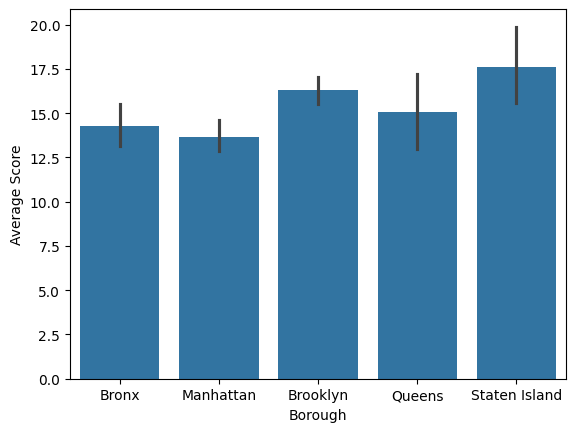

In [74]:
sns.barplot(x = 'Borough', y = 'Average Score', data = table_data)

<Axes: xlabel='Total_Reviews', ylabel='Rating'>

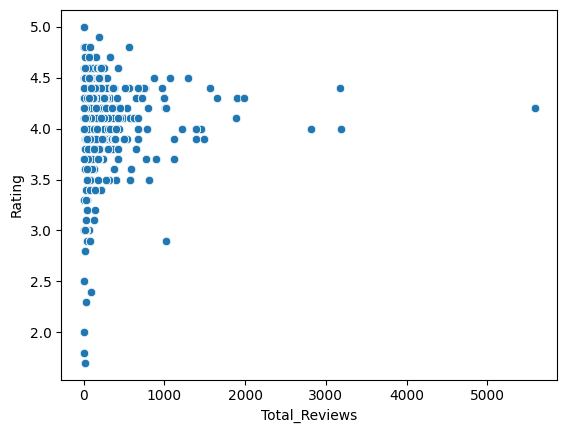

In [75]:
sns.scatterplot(x = 'Total_Reviews', y = 'Rating', data = table_data)

<Axes: xlabel='Average Score', ylabel='Rating'>

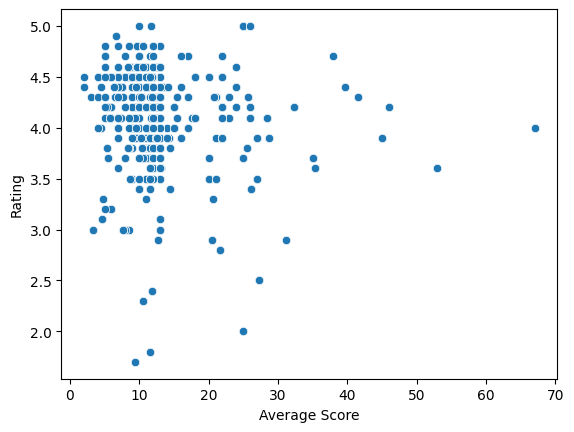

In [81]:
sns.scatterplot(x = 'Average Score', y = 'Rating', data = table_data)

<Axes: xlabel='Inspections Passed', ylabel='Rating'>

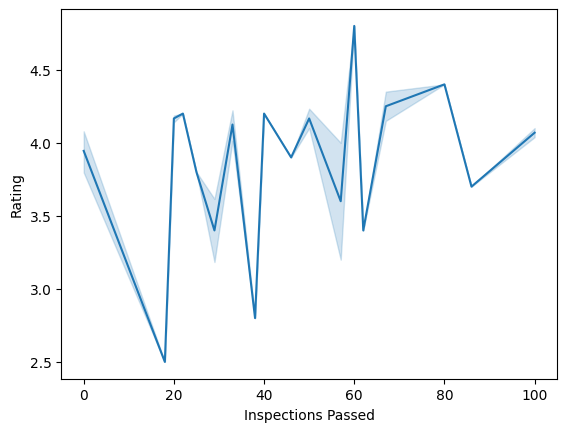

In [77]:
sns.lineplot(x = 'Inspections Passed', y = 'Rating', data = table_data)

<Axes: xlabel='Overall Grade', ylabel='Rating'>

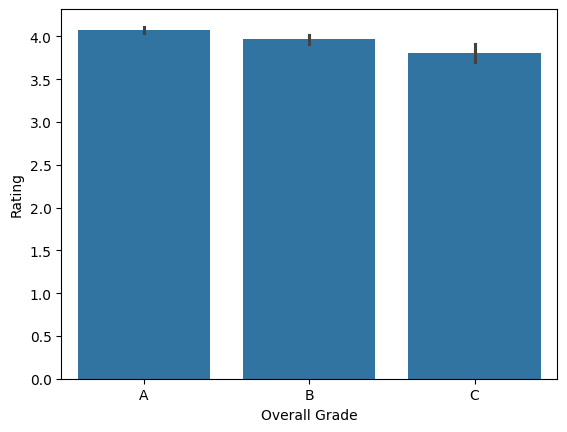

In [78]:
sns.barplot(x = 'Overall Grade', y = 'Rating', data = table_data)

<Axes: xlabel='Borough', ylabel='Rating'>

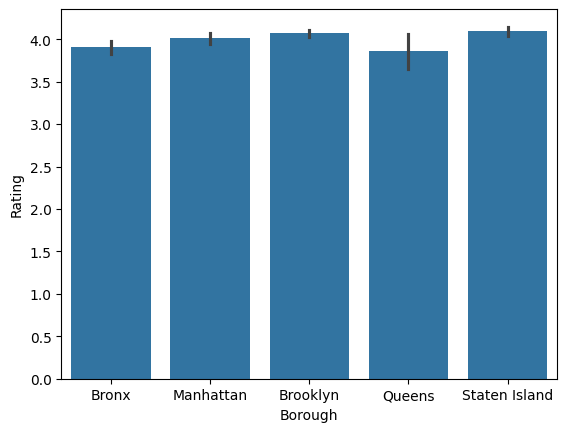

In [82]:
sns.barplot(x = 'Borough', y = 'Rating', data = table_data)